## Chapter 1 Oven Example ##
Consider an oven used to cure plastic parts. The outer surface is measured to be 400 K in a room that is 300 K. You are asked to conduct a parametric study examining the effects of changes in the thermal conductivity ($k$), the convective heat transfer coefficient ($h$), and the emissivity ($\varepsilon$).


First we need to import all the necessary toolboxes...
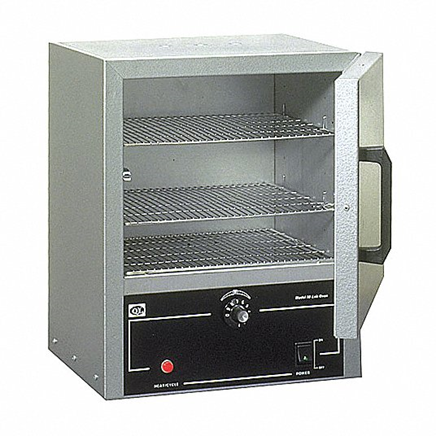

In [1]:
# import fsolve from scipy 
from scipy.optimize import fsolve 
# import all the standard math functions and plotting stuff we'd want from numpy and matplotlib
from numpy import*
import matplotlib.pyplot as plt
# This makes the plots appear inside the notebook
%matplotlib inline 

After importing all the necessary toolboxes, we can begin by defining our variables...

In [2]:
## Set your constants
L = 0.05 #[m] oven thickness
k = 0.7 #[W/mK] oven thermal conductivity
em = 0.8 # [-] oven outer surface emissivity
h = 20 #[W/m2K] ambient convective heat transfer coefficient
sig = 5.67e-8 #[W/m2K4] Stefan-Boltzman constant
#
T2 = 400 #[K] oven outer surface temp
Tinf = 300 #[K] room temp

Next we'll need to conduct an energy balance:

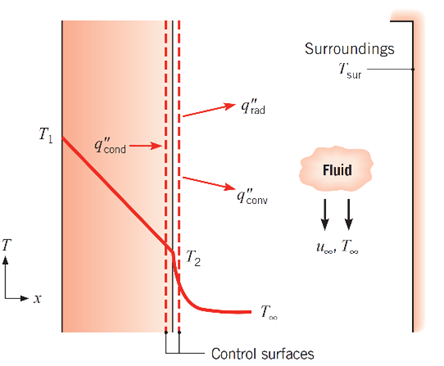

$
q^{''}_\text{cond} - q^{''}_\text{conv} - q^{''}_\text{rad} = 0
$

substituting in...

$
\frac{k}{L}\left(T_1 - T_2\right) - \varepsilon \sigma \left(T^4_2 - T^4_\text{surr}\right) - h\left(T_2-T_\infty\right) = 0
$

One equation, one unknown ($T_1$) allows us to solve...



In [3]:
# Define the equations 
def eqns(vars):
    T1 = vars
    eq1 = k/L*(T1-T2) - em*sig*(T2**4-Tinf**4) - h*(T2-Tinf)
    return eq1

# Now call the solver function with some initial guesses
T1 = fsolve(eqns, 300)

print("T1 = %.3f K" % T1)

T1 = 599.557 K


## Sweeping k
Now, let's make a plot looking at how things change over a range of $k$-values if we assume T_oven is set at 600 K:

In [4]:
T1 = 600 #[K]
ki = logspace(0,3) #creates a log space (i.e., vs. a linspace) of k values from 1 to 1000
T2i = zeros(len(ki))
qcondi = zeros(len(ki))
qconvi = zeros(len(ki))
qradi = zeros(len(ki))

for i in range(len(ki)):
    def eqn(vars):
        T2 = vars
        eq1 = ki[i]/L*(T1-T2) - em*sig*(T2**4-Tinf**4) - h*(T2-Tinf)
        return eq1
    # Now call the solver function with some initial guesses
    T2i[i]= fsolve(eqn, 300) # outisde oven temp, T2
    qcondi[i] = ki[i]/L*(T1-T2i[i]) # conduction heat flux (W/m2)
    qconvi[i] = h*(T2i[i]-Tinf) # convection heat flux (W/m2)
    qradi[i] = em*sig*(T2i[i]**4 - Tinf**4); # radiation heat flux (W/m2)

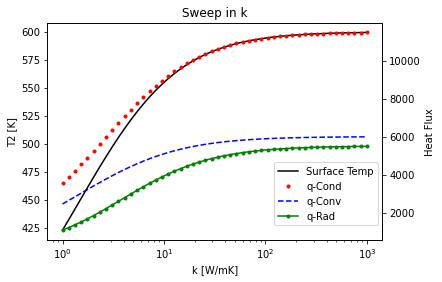

In [5]:
# Plotting the data
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
#
ax1.semilogx(ki, T2i, 'k')
ax2.semilogx(ki, qcondi, '.r')
ax2.semilogx(ki, qconvi, '--b')
ax2.semilogx(ki, qradi, '.-g')
#
ax1.set_xlabel('k [W/mK]')
ax1.set_ylabel('T2 [K]')
ax2.set_ylabel('Heat Flux')
fig.legend(['Surface Temp','q-Cond','q-Conv','q-Rad'],loc=(.62,.2))
plt.title('Sweep in k')
plt.show()

Q: what happens as k is increased?
A: T2 approaches T1!

Note that Qcond goes up (of course, b/c k is going up), but also see how Qconv and Qrad go up ... why?

## Sweeping h
Now, let's make a plot looking at how things change over a range of $h$-values if we assume T_oven is set at 600 K:

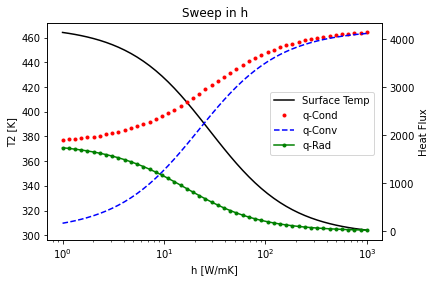

In [6]:
T1 = 600 #[K]
hi = logspace(0,3) #creates a log space (i.e., vs. a linspace) of k values from 1 to 1000
T2i = zeros(len(ki))
qcondi = zeros(len(ki))
qconvi = zeros(len(ki))
qradi = zeros(len(ki))

for i in range(len(hi)):
    def eqn(vars):
        T2 = vars
        eq1 = k/L*(T1-T2) - em*sig*(T2**4-Tinf**4) - hi[i]*(T2-Tinf)
        return eq1
    # Now call the solver function with some initial guesses
    T2i[i]= fsolve(eqn, 300) # outisde oven temp, T2
    qcondi[i] = k/L*(T1-T2i[i]) # conduction heat flux (W/m2)
    qconvi[i] = hi[i]*(T2i[i]-Tinf) # convection heat flux (W/m2)
    qradi[i] = em*sig*(T2i[i]**4 - Tinf**4); # radiation heat flux (W/m2)
    
# Plotting the data
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
#
ax1.semilogx(hi, T2i, 'k')
ax2.semilogx(hi, qcondi, '.r')
ax2.semilogx(hi, qconvi, '--b')
ax2.semilogx(hi, qradi, '.-g')
#
ax1.set_xlabel('h [W/mK]')
ax1.set_ylabel('T2 [K]')
ax2.set_ylabel('Heat Flux')
fig.legend(['Surface Temp','q-Cond','q-Conv','q-Rad'],loc=(.62,.45))
plt.title('Sweep in h')
plt.show()

Q: what happens as h increases?

A: T2 approaches Tinf!

Again, because h goes up, Qconv goes up, but what about Qcond and Qrad -- why do they look like they do?